## Figure 2 plot

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.ticker as mtick

In [2]:
# data input
asv_rel_f = pd.read_csv('data/asv-level-5-rel.csv', index_col=0)
asv_rel_g = pd.read_csv('data/asv-level-6-rel.csv', index_col=0)

In [3]:
# define functions
def topdf(df,n):
    '''return the df on top10 level'''
    top10 = df.sum(axis=1).sort_values(ascending=False)[:n].index
    top10df = df.loc[top10]
    return top10df

def remove_first_n_char(org_str, n):
    """ Return a string by deleting first n
    characters from the string """
    mod_string = ""
    for i in range(n, len(org_str)):
        mod_string = mod_string + org_str[i]
    return mod_string


def reformat(df, N):
    df1 = AAD(topdf(df, N)).unstack().reset_index()
    df2 = non(topdf(df, N)).unstack().reset_index()

    df1.columns = ['ID', 'Taxon', 'Abundance']
    df1['Day'] = ['D'+str(x.split('D')[1]) for x in df1['ID']]
    df1['Day_num'] = [int(x.split('D')[1]) for x in df1['ID']]
    df2.columns = ['ID', 'Taxon', 'Abundance']
    df2['Day'] = ['D'+str(x.split('D')[1]) for x in df2['ID']]
    df2['Day_num'] = [int(x.split('D')[1]) for x in df2['ID']]
    df1['Group'] = 'AAD'
    df2['Group'] = 'non-AAD'
    results = pd.concat([df1, df2], axis='rows')
    return results

def reformat_v2(df,keywords):
    df1 = AAD(df[df.index.str.contains(keywords)]).unstack().reset_index()
    df2 = non(df[df.index.str.contains(keywords)]).unstack().reset_index()

    df1.columns = ['ID','Taxon','Abundance']
    df1['Day']  =['D'+str(x.split('D')[1]) for x in df1['ID']]
    df2.columns = ['ID','Taxon','Abundance']
    df2['Day']  =['D'+str(x.split('D')[1]) for x in df2['ID']]
    df1['Group']='AAD'
    df2['Group']='non-AAD'
    results = pd.concat([df1,df2], axis='rows') 
    return results

In [4]:
# define AAD group
## AAD: S2, S10, S15, S16, S24, S1, S5-S7, S19-S21, S13 => 13 AAD vs 17 non-AAD

def AAD(df):
    AAD = df.filter(
        regex="S2D|S10D|S15|S16|S24|S1D|S5D|S6D|S7D|S13D|S19|S20|S21")
    return AAD

def non(df):
    non = df.filter(
        regex="S3D|S4D|S8D|S9D|S11D|S12D|S14|S17|S22|S23|S25|S26|S27|S29|S30|S31|S33")
    return non

In [5]:
# Set custom color palette with paired color scales
colorcodes = ['#8dd3c7', '#fdb462', '#bebada', '#fb8072',
              '#80b1d3', '#ffed6f',  '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd']
darken_colorcodes = ['#368c7d', '#be6502', '#7d75b5', '#d61b06',
                     '#2b5b7d', '#dec200', '#54761a', '#f99bcb', '#b3b3b3', '#512a52']

merge_colorcodes = []
for i in range(8):
    merge_colorcodes.append(colorcodes[i])
    merge_colorcodes.append(darken_colorcodes[i])

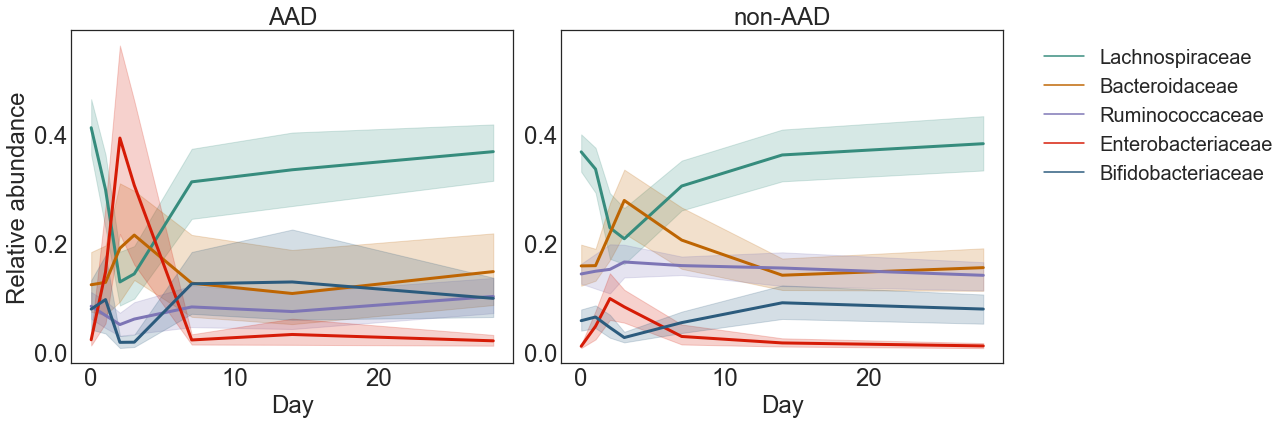

In [6]:
## Figure 2A - community disturbance between AAD and non-AAD at family level - line plots

# reformat the df to the required formats at the family level for the plotting inputs
df = reformat(asv_rel_f, 5)
dfaad = df[df['Group'] == 'AAD']
dfnon = df[df['Group'] == 'non-AAD']

sns.set_palette(sns.color_palette(darken_colorcodes))
plt.style.use('seaborn-white')
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
sns.lineplot(data=dfaad, x='Day_num', y='Abundance',
             hue='Taxon', ax=ax0, linewidth=3)
sns.lineplot(data=dfnon, x='Day_num', y='Abundance',
             hue='Taxon', ax=ax1, linewidth=3)

ax0.get_legend().remove()
ax1.get_legend().remove()

fontsize = 24
handles, labels = ax1.get_legend_handles_labels()
labels2 = [x.split(';')[4:] for x in labels]
labels3 = []
for i, content in enumerate(labels2):
    labels3.append([remove_first_n_char(x, 3) for x in content])
labels3 = [(';').join(x) for x in labels3]
ax1.legend(handles, labels3, loc=2, bbox_to_anchor=(1.05, 1), fontsize=20)

ax0.set_title('AAD', size=fontsize)
ax1.set_title('non-AAD', size=fontsize)
ax0.set_ylabel('Relative abundance', size=fontsize)
ax1.set_ylabel('Relative abundance', size=fontsize)

ax0.set_xlabel('Day', size=fontsize)
ax1.set_xlabel('Day', size=fontsize)
ax0.tick_params(axis='both', which='major', labelsize=fontsize, labelleft=True)
ax1.tick_params(axis='both', which='major', labelsize=fontsize, labelleft=True)
plt.tight_layout()
plt.savefig('plots/Figure2A_top5_f.svg',bbox_inches='tight', dpi=300)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

D1_AAD v.s. D1_non-AAD: Mann-Whitney-Wilcoxon test two-sided, P_val=5.934e-01 U_stat=8.400e+01
D0_AAD v.s. D0_non-AAD: Mann-Whitney-Wilcoxon test two-sided, P_val=3.572e-01 U_stat=1.330e+02
D2_AAD v.s. D2_non-AAD: Mann-Whitney-Wilcoxon test two-sided, P_val=2.046e-02 U_stat=4.200e+01
D3_AAD v.s. D3_non-AAD: Mann-Whitney-Wilcoxon test two-sided, P_val=8.618e-02 U_stat=6.900e+01
D7_AAD v.s. D7_non-AAD: Mann-Whitney-Wilcoxon test two-sided, P_val=9.250e-01 U_stat=9.600e+01
D14_AAD v.s. D14_non-AAD: Mann-Whitney-Wilcoxon test two-sided, P_val=6.084e-01 U_stat=7.900e+01
D28_AAD v.s. D28_non-AAD: Mann-Whitney-Wilcoxon test two-sided, P_val=9.034e-01 U_stat=8.800e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

D1_

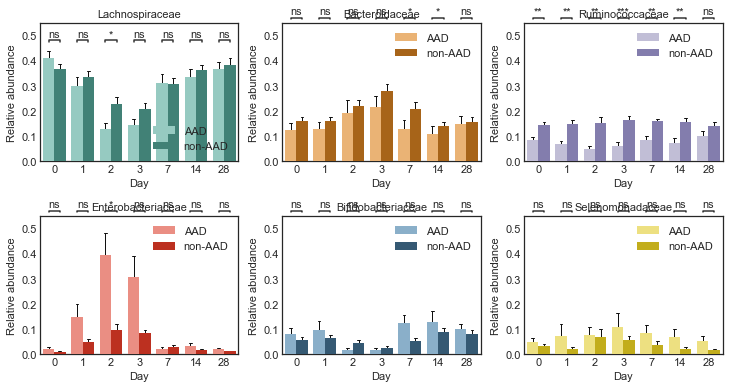

In [7]:
## Figure 2B - community disturbance between AAD and non-AAD at family level - bar plots
day_order = ['D0','D1','D2','D3','D7','D14','D28']
cm = 1/2.54
fig, axes = plt.subplots(2,3,sharey=True, sharex=True,figsize=[26*cm,14*cm])

# reformat the dataframe
df = reformat(asv_rel_f, 6)
id = df.Taxon.unique()

# plot the nested barplot and error bars
# notice the zorder
plt.style.use('seaborn-white')
fontvalue=11
for i,ax in enumerate(axes.flatten()):
    subdf = df[df.Taxon ==id[i]]
    sns.barplot(data=subdf,x="Day", y="Abundance", hue="Group",order=day_order,
            ci=68,errcolor='#101010',errwidth=1,capsize=0.1,
            zorder=5,ax=ax, palette=merge_colorcodes[i*2:(i+1)*2]) # SEM errorbars
    ax.set_xticklabels(['0','1','2','3','7','14','28'])

    #add_stat_annotation(ax, data=subdf.loc[subdf['Group']=='AAD'], x='Day', y='Abundance',order=day_order,box_pairs = [ ("D0", "D2"), ("D0", "D3"),], test='Mann-Whitney', text_format='star', loc='inside', line_height=0, verbose=2, color=colorcodes[i]) #("D0", "D1"),("D0", "D7"),("D0", "D14"),("D0", "D28")
    #add_stat_annotation(ax, data=subdf.loc[subdf['Group']=='non-AAD'], x='Day', y='Abundance',order=day_order,box_pairs = [ ("D0", "D2"), ("D0", "D3"),], test='Mann-Whitney', text_format='star', loc='inside',line_height=0,verbose=2,color=darken_colorcodes[i]) 
    
    box_pairs = [
    (('D0','AAD'),('D0','non-AAD')),
    (('D1','AAD'),('D1','non-AAD')),
    (('D2','AAD'),('D2','non-AAD')),
    (('D3','AAD'),('D3','non-AAD')),
    (('D7','AAD'),('D7','non-AAD')),
    (('D14','AAD'),('D14','non-AAD')),
    (('D28','AAD'),('D28','non-AAD')),] 

    add_stat_annotation(ax, data=subdf, x='Day', y='Abundance',line_height=0.01,hue='Group',order=day_order,box_pairs = box_pairs, test='Mann-Whitney', comparisons_correction=None, text_format='star', loc='outside', verbose=2, fontsize=fontvalue)

    ax.tick_params(axis='both',labelsize=fontvalue,direction="in",labelbottom=True, labelleft=True)
    ax.set_title(id[i].split(';')[-1].split('__')[-1],size=fontvalue)
    ax.set_xlabel('Day',size=fontvalue)
    ax.set_ylabel('Relative abundance',size=fontvalue)
    ax.set_ylim((0,0.55))
    ax.legend().set_title('')
    ax.legend(fontsize=fontvalue)
    plt.tight_layout() 

plt.savefig('plots/Figure2B_top6_f.svg', dpi=300)


In [8]:
## Figure 2C - pie plots of Ruminococaceae 

asv_rel_g_rumino = asv_rel_g[asv_rel_g.index.str.contains(
    'f__Ruminococcaceae')]
asv_rel_g_rumino_avg = asv_rel_g_rumino.div(
    asv_rel_g_rumino.sum(axis=0), axis=1).mean(axis=1).to_frame()
asv_rel_g_rumino_avg.columns = ['Ruminococcaceae']
asv_rel_g_rumino_avg.index = [
    x.split(';')[-1].split('__')[-1] for x in asv_rel_g_rumino_avg.index]

In [9]:
top3_rumino_g = topdf(asv_rel_g_rumino,3)
top3 = [x.split(';')[-1].split('__')[-1] for x in top3_rumino_g.index]

rumino_complete = asv_rel_g_rumino_avg.loc[top3]['Ruminococcaceae'].tolist()
rumino_complete.append(1-sum(rumino_complete)) #append "others" abundance
top3.append('Others') #append "others" label

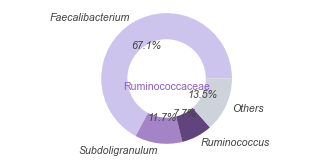

In [10]:
colorcodes = ['#CCC4ED', '#a484c7', '#61447e', '#CED3DB']
sns.set_palette(sns.color_palette(colorcodes))
sns.color_palette()

cm = 1/2.54
pie, ax = plt.subplots(figsize=[12*cm, 6*cm])
fontvalue = 10.5
ax.pie(x=rumino_complete, labels=top3, autopct="%.1f%%",  textprops={
       'fontsize': fontvalue, 'color': '#404040', 'style': 'italic'})  # explode=[0.03]*4,,pctdistance=0.5

#draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.text(0.5, 0.45, 'Ruminococcaceae', ha='center',
         size=fontvalue, color='#915cc8')
         
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.tight_layout()
plt.show()
pie.savefig("plots/Figure2C_rumino_top3_genus.svg",dpi=300)


In [11]:
## Figure 2D - community disturbance between AAD and non-AAD at genus level within Ruminococaceae - bar plots  


def genera_barplot(df,keyword):
    # reformat the dataframe
    dfxxx = reformat_v2(df,keyword)
    plt.style.use('seaborn-white')
    cm = 1/2.54
    fig, ax = plt.subplots(1,figsize=[7.5*cm,6*cm])
    id = dfxxx.Taxon.unique()
    day_order = ['D0','D1','D2','D3','D7','D14','D28']
    fontvalue=11

    sns.barplot(data=dfxxx,x="Day", y="Abundance", hue="Group",order=day_order,
            ci=68,errcolor='#101010',errwidth=1,capsize=0.1,zorder=5,ax=ax,palette=['#fb8072', '#80b1d3'] )  # SEM errorbars  
    
    ax.legend().set_title('')
    ax.legend(fontsize=fontvalue, loc='upper right')
    ax.set_xticklabels(['0','1','2','3','7','14','28'])
    
    ax.tick_params(axis='x',labelsize=fontvalue,direction="in")
    ax.tick_params(axis='y',labelsize=fontvalue,direction="in")
    ax.set_xlabel('Day',size=fontvalue)
    ax.set_ylabel('Relative abundance',size=fontvalue)
    ax.set_title(id[0].split(';')[-1].split('__')[-1],size=fontvalue,style='italic')
    #ax.set_ylim([0,0.05])   #0.05 vs 0.02
    ax.set_ylim([0,0.25])

    box_pairs = [
        (('D0','AAD'),('D0','non-AAD')),
        (('D1','AAD'),('D1','non-AAD')),
        (('D2','AAD'),('D2','non-AAD')),
        (('D3','AAD'),('D3','non-AAD')),
        (('D7','AAD'),('D7','non-AAD')),
        (('D14','AAD'),('D14','non-AAD')),
        (('D28','AAD'),('D28','non-AAD'))] 

    add_stat_annotation(ax, data=dfxxx, x='Day', y='Abundance',line_height=0.01,hue='Group',order=day_order,box_pairs = box_pairs, test='Mann-Whitney-ls',  text_format='star', comparisons_correction='bonferroni',loc='outside', verbose=2, fontsize=fontvalue)
    plt.tight_layout()
    return ax

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

D1_AAD v.s. D1_non-AAD: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=3.493e-02 U_stat=4.000e+01
D0_AAD v.s. D0_non-AAD: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=1.721e-01 U_stat=6.300e+01
D2_AAD v.s. D2_non-AAD: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=1.509e-02 U_stat=3.100e+01
D3_AAD v.s. D3_non-AAD: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=4.446e-03 U_stat=3.300e+01
D7_AAD v.s. D7_non-AAD: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=2.082e-03 U_stat=2.000e+01
D14_AAD v.s. D14_non-AAD: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=5.502e-02 U_stat=4.000e+01
D28_AAD v.s. D28_non-AAD: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=4.423e-01 U_stat=5.

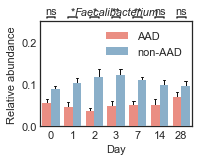

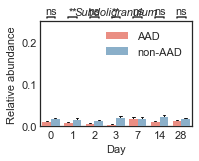

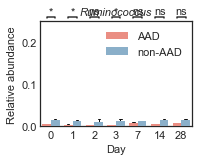

In [12]:
genera_barplot(asv_rel_g,'d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Faecalibacterium')
genera_barplot(asv_rel_g,'d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Subdoligranulum')
genera_barplot(asv_rel_g,'d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Ruminococcus')
plt.savefig('plots/Figure2D_g__Ruminococcus.svg',dpi=300)
plt.savefig('plots/Figure2D_g__Subdoligranulum.svg',dpi=300)
plt.savefig('plots/Figure2D_g__Faecalibacterium_1.svg',dpi=300)